# Evaluations w.r.t. dimensionaly and so on

In [1]:
import numpy as np
import random

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import axis, colorbar, imshow, show, figure, subplot
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import cm
%matplotlib inline

import os, sys, inspect
import csv

import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
save_plots = False

## Paths

In [3]:
from utils_ae_eval_paths import *

HISTORY_PATH = f'{kitkatdir}/saved_models'
PATH = MEASUREMENTS_FOLDER
FIGURES_FOLDER = FIGURES_FOLDER

## Cost Functions


### Nice Plot for Cost Function

In [4]:
# get history for choosen model:
choosen_latent = 64
history = np.load(f'{HISTORY_PATH}/latent{choosen_latent}/HISTORY.npy', allow_pickle='TRUE').item()
no_epochs = len(history['loss'])

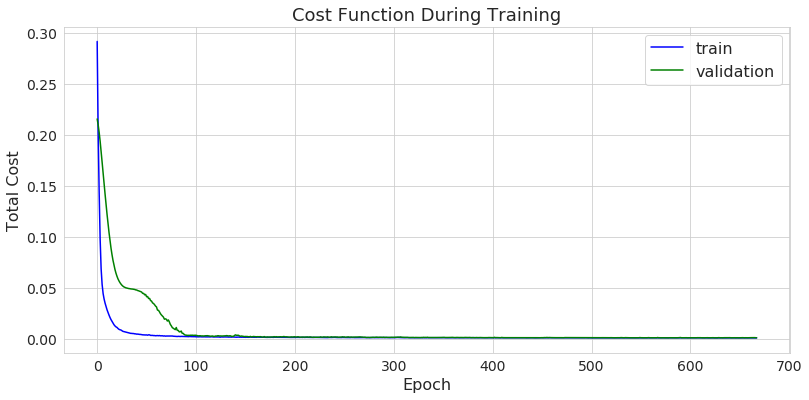

In [5]:
plt.figure(figsize=(13, 6))
mpl.rcParams['legend.handlelength'] = 2

# summarize history for loss:
plt.plot(history['loss'], color='blue', label='train')
#plt.plot(history['val_loss'], color='blue', alpha=0.4, label='validation')
plt.plot(history['val_loss'], color='green', label='validation')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Total Cost', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Cost Function During Training', fontsize=18)

#plt.xlim(10,no_epochs)
#plt.ylim(0,1000)
#np.arange(0, no_epochs, step=10)
plt.legend(loc='upper right', fontsize=16)
plt.show()

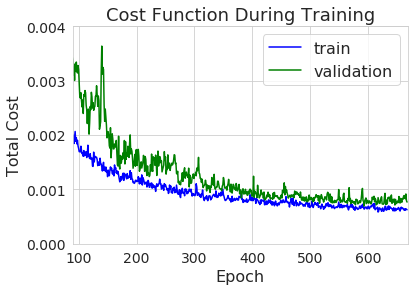

In [6]:
plt.figure(figsize=(6, 4))
mpl.rcParams['legend.handlelength'] = 2

# summarize history for loss:
plt.plot(history['loss'], color='blue', label='train')
plt.plot(history['val_loss'], color='green', alpha=1, label='validation')
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Total Cost', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Cost Function During Training', fontsize=18)

plt.xlim(90, no_epochs)
plt.ylim(0.00,0.004)
#np.arange(0, no_epochs, step=10)
plt.legend(loc='upper right', fontsize=16)
plt.show()

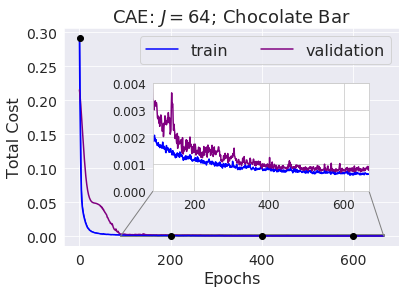

In [7]:
sns.set_style("darkgrid")
mpl.rcParams['legend.handlelength'] = 2

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(history['loss'], color='blue', label='train')
ax.plot(history['val_loss'], color='purple', label='validation')
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Total Cost', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title(r'CAE: $J=64$; Chocolate Bar', fontsize=18)
plt.legend(loc='upper right', ncol=2, fontsize=16)

marks = [1, 200,400,600]#,800,1000,1200,1400,1600,1800,2000]
marks = [x - 1 for x in marks]
ax.plot(np.arange(1, no_epochs+1), history['loss'], c='blue', linestyle='-', lw=1, 
        markerfacecolor='black', markeredgecolor='black', marker='o', markevery=marks, label='train')

# Zoom in on data:
sns.set_style("whitegrid")
axins = inset_axes(ax, 3.0,1.5, loc=5, borderpad=3)           # zoom-factor and location (loc)
axins.plot(history['loss'], color='blue', label='train')
axins.plot(history['val_loss'], color='purple', label='validation')

x1, x2, y1, y2 = 90, no_epochs, 0.000, 0.004                    # specify the limits
axins.set_xlim(x1, x2)                                          # apply the x-limits
axins.set_ylim(y1, y2)                                          # apply the y-limits
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")      # fancy zoom effect
axins.tick_params(axis='both', which='major', labelsize=12)

if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/loss_ae_kitkat.png", dpi=300, bbox_inches='tight')
plt.show()

## Plot the remaining learning curves

In [8]:
save_plots = False

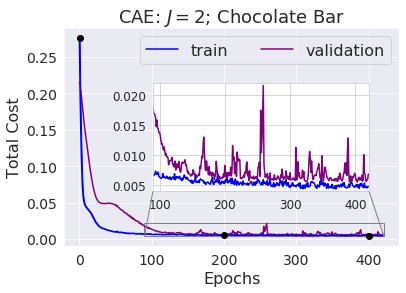

In [9]:
# get history for choosen model:
choosen_latent = 2
history = np.load(f'{HISTORY_PATH}/latent{choosen_latent}/HISTORY.npy', allow_pickle='TRUE').item()
no_epochs = len(history['loss'])

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(history['loss'], color='blue', label='train')
ax.plot(history['val_loss'], color='purple', label='validation')
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Total Cost', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title(r'CAE: $J={:}$; Chocolate Bar'.format(choosen_latent), fontsize=18)
    
plt.legend(loc='upper right', ncol=2, fontsize=16)

marks = [1, 200,400]
marks = [x - 1 for x in marks]
ax.plot(np.arange(1, no_epochs+1), history['loss'], c='blue', linestyle='-', lw=1, 
        markerfacecolor='black', markeredgecolor='black', marker='o', markevery=marks, label='train')

# Zoom in on data:
sns.set_style("whitegrid")
axins = inset_axes(ax, 3.0,1.5, loc=5, borderpad=3)           # zoom-factor and location (loc)
axins.plot(history['loss'], color='blue', label='train')
axins.plot(history['val_loss'], color='purple', label='validation')

x1, x2, y1, y2 = 90, no_epochs, 0.004, 0.022                    # specify the limits
axins.set_xlim(x1, x2)                                          # apply the x-limits
axins.set_ylim(y1, y2)                                          # apply the y-limits
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")      # fancy zoom effect
axins.tick_params(axis='both', which='major', labelsize=12)

if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/loss_ae_kitkat_J{choosen_latent}.png", dpi=300, bbox_inches='tight')
plt.show()

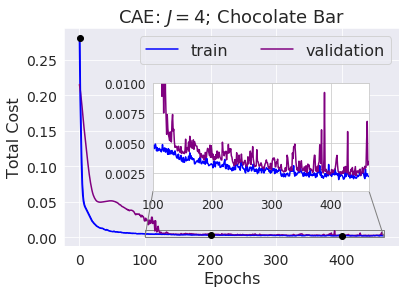

In [10]:
# get history for choosen model:
choosen_latent = 4
history = np.load(f'{HISTORY_PATH}/latent{choosen_latent}/HISTORY.npy', allow_pickle='TRUE').item()
no_epochs = len(history['loss'])

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(history['loss'], color='blue', label='train')
ax.plot(history['val_loss'], color='purple', label='validation')
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Total Cost', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title(r'CAE: $J={:}$; Chocolate Bar'.format(choosen_latent), fontsize=18)
    
plt.legend(loc='upper right', ncol=2, fontsize=16)

marks = [1, 200,400]
marks = [x - 1 for x in marks]
ax.plot(np.arange(1, no_epochs+1), history['loss'], c='blue', linestyle='-', lw=1, 
        markerfacecolor='black', markeredgecolor='black', marker='o', markevery=marks, label='train')

# Zoom in on data:
sns.set_style("whitegrid")
axins = inset_axes(ax, 3.0,1.5, loc=5, borderpad=3)           # zoom-factor and location (loc)
axins.plot(history['loss'], color='blue', label='train')
axins.plot(history['val_loss'], color='purple', label='validation')

x1, x2, y1, y2 = 100, no_epochs, 0.001, 0.010                    # specify the limits
axins.set_xlim(x1, x2)                                          # apply the x-limits
axins.set_ylim(y1, y2)                                          # apply the y-limits
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")      # fancy zoom effect
axins.tick_params(axis='both', which='major', labelsize=12)

if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/loss_ae_kitkat_J{choosen_latent}.png", dpi=300, bbox_inches='tight')
plt.show()

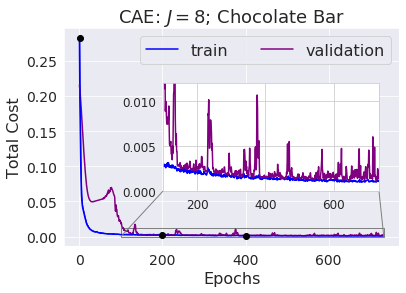

In [11]:
# get history for choosen model:
choosen_latent = 8
history = np.load(f'{HISTORY_PATH}/latent{choosen_latent}/HISTORY.npy', allow_pickle='TRUE').item()
no_epochs = len(history['loss'])

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(history['loss'], color='blue', label='train')
ax.plot(history['val_loss'], color='purple', label='validation')
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Total Cost', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title(r'CAE: $J={:}$; Chocolate Bar'.format(choosen_latent), fontsize=18)
    
plt.legend(loc='upper right', ncol=2, fontsize=16)

marks = [1, 200,400]
marks = [x - 1 for x in marks]
ax.plot(np.arange(1, no_epochs+1), history['loss'], c='blue', linestyle='-', lw=1, 
        markerfacecolor='black', markeredgecolor='black', marker='o', markevery=marks, label='train')

# Zoom in on data:
sns.set_style("whitegrid")
axins = inset_axes(ax, 3.0,1.5, loc=5, borderpad=2)           # zoom-factor and location (loc)
axins.plot(history['loss'], color='blue', label='train')
axins.plot(history['val_loss'], color='purple', label='validation')

x1, x2, y1, y2 = 100, no_epochs, 0.000, 0.012                    # specify the limits
axins.set_xlim(x1, x2)                                          # apply the x-limits
axins.set_ylim(y1, y2)                                          # apply the y-limits
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")      # fancy zoom effect
axins.tick_params(axis='both', which='major', labelsize=12)

if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/loss_ae_kitkat_J{choosen_latent}.png", dpi=300, bbox_inches='tight')
plt.show()

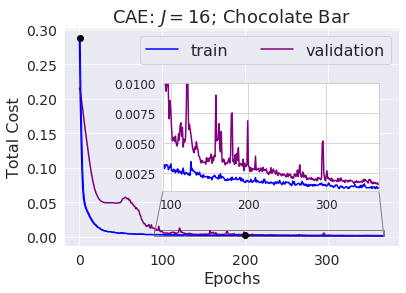

In [12]:
# get history for choosen model:
choosen_latent = 16
history = np.load(f'{HISTORY_PATH}/latent{choosen_latent}/HISTORY.npy', allow_pickle='TRUE').item()
no_epochs = len(history['loss'])

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(history['loss'], color='blue', label='train')
ax.plot(history['val_loss'], color='purple', label='validation')
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Total Cost', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title(r'CAE: $J={:}$; Chocolate Bar'.format(choosen_latent), fontsize=18)
    
plt.legend(loc='upper right', ncol=2, fontsize=16)

marks = [1, 200]
marks = [x - 1 for x in marks]
ax.plot(np.arange(1, no_epochs+1), history['loss'], c='blue', linestyle='-', lw=1, 
        markerfacecolor='black', markeredgecolor='black', marker='o', markevery=marks, label='train')

# Zoom in on data:
sns.set_style("whitegrid")
axins = inset_axes(ax, 3.0,1.5, loc=5, borderpad=2)           # zoom-factor and location (loc)
axins.plot(history['loss'], color='blue', label='train')
axins.plot(history['val_loss'], color='purple', label='validation')

x1, x2, y1, y2 = 90, no_epochs, 0.001, 0.010                    # specify the limits
axins.set_xlim(x1, x2)                                          # apply the x-limits
axins.set_ylim(y1, y2)                                          # apply the y-limits
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")      # fancy zoom effect
axins.tick_params(axis='both', which='major', labelsize=12)

if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/loss_ae_kitkat_J{choosen_latent}.png", dpi=300, bbox_inches='tight')
plt.show()

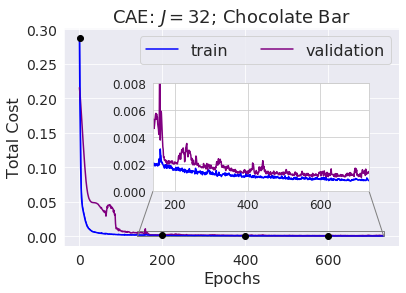

In [13]:
# get history for choosen model:
choosen_latent = 32
history = np.load(f'{HISTORY_PATH}/latent{choosen_latent}/HISTORY.npy', allow_pickle='TRUE').item()
no_epochs = len(history['loss'])

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(history['loss'], color='blue', label='train')
ax.plot(history['val_loss'], color='purple', label='validation')
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Total Cost', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title(r'CAE: $J={:}$; Chocolate Bar'.format(choosen_latent), fontsize=18)
    
plt.legend(loc='upper right', ncol=2, fontsize=16)

marks = [1, 200,400,600]
marks = [x - 1 for x in marks]
ax.plot(np.arange(1, no_epochs+1), history['loss'], c='blue', linestyle='-', lw=1, 
        markerfacecolor='black', markeredgecolor='black', marker='o', markevery=marks, label='train')

# Zoom in on data:
sns.set_style("whitegrid")
axins = inset_axes(ax, 3.0,1.5, loc=5, borderpad=3)           # zoom-factor and location (loc)
axins.plot(history['loss'], color='blue', label='train')
axins.plot(history['val_loss'], color='purple', label='validation')

x1, x2, y1, y2 = 140, no_epochs, 0.000, 0.008                    # specify the limits
axins.set_xlim(x1, x2)                                          # apply the x-limits
axins.set_ylim(y1, y2)                                          # apply the y-limits
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")      # fancy zoom effect
axins.tick_params(axis='both', which='major', labelsize=12)

if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/loss_ae_kitkat_J{choosen_latent}.png", dpi=300, bbox_inches='tight')
plt.show()

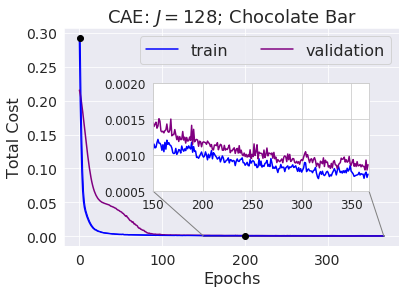

In [14]:
# get history for choosen model:
choosen_latent = 128
history = np.load(f'{HISTORY_PATH}/latent{choosen_latent}/HISTORY.npy', allow_pickle='TRUE').item()
no_epochs = len(history['loss'])

sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(history['loss'], color='blue', label='train')
ax.plot(history['val_loss'], color='purple', label='validation')
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Total Cost', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_title(r'CAE: $J={:}$; Chocolate Bar'.format(choosen_latent), fontsize=18)
    
plt.legend(loc='upper right', ncol=2, fontsize=16)

marks = [1, 200]
marks = [x - 1 for x in marks]
ax.plot(np.arange(1, no_epochs+1), history['loss'], c='blue', linestyle='-', lw=1, 
        markerfacecolor='black', markeredgecolor='black', marker='o', markevery=marks, label='train')

# Zoom in on data:
sns.set_style("whitegrid")
axins = inset_axes(ax, 3.0,1.5, loc=5, borderpad=3)           # zoom-factor and location (loc)
axins.plot(history['loss'], color='blue', label='train')
axins.plot(history['val_loss'], color='purple', label='validation')

x1, x2, y1, y2 = 150, no_epochs, 0.0005, 0.002                    # specify the limits
axins.set_xlim(x1, x2)                                          # apply the x-limits
axins.set_ylim(y1, y2)                                          # apply the y-limits
mark_inset(ax, axins, loc1=3, loc2=4, fc="none", ec="0.5")      # fancy zoom effect
axins.tick_params(axis='both', which='major', labelsize=12)

if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/loss_ae_kitkat_J{choosen_latent}.png", dpi=300, bbox_inches='tight')
plt.show()

## Error vs. Intermediate Dimensionality (lantent space / bottleneck)

Average reconstruction error

In [15]:
from utils_VAE_AE import rec_statistics

In [16]:
def mean_of_mean(allMeans):
    """
    compute the mean of means and its error.
    """
    MeanOfMean = allMeans.mean()
    err = allMeans.std(ddof=1) / np.sqrt(len(allMeans))
    return MeanOfMean, err

### Load Pre-Computed Reconstruction Errors of Models and subsequently compute their statistics

over more than one run

In [17]:
""" indexing """
LATENT_NAMES = ('J=2', 'J=4', 'J=8', 'J=16', 'J=32', 'J=64', 'J=128')
ALL_FILENAMES = ['J2_AR50', 'J4_AR50', 'J8_AR50', 'J16_AR50','J32_AR50', 'J64_AR50', 'J128_AR50']

In [18]:
""" Normal Samples """
COLUMN_NAMES = 'rec0_mean'

""" read mean reconstruction errors """
dfs_normal = []
for m in range(len(ALL_FILENAMES)):
    # load column from dataframe:
    df = pd.read_csv(f'{PATH}/{ALL_FILENAMES[m]}.csv', 
                     usecols = [f'{COLUMN_NAMES}']
                    )
    # append to empty list:
    dfs_normal.append(df)

# convert to dataframe:
dfs_normal = pd.concat(dfs_normal, axis=1)
dfs_normal.columns = LATENT_NAMES
#dfs_normal

""" compute mean of means and its error for each latent dimension and save as numpy arrays """
rec0_means, rec0_errs = [], []
for column_name in dfs_normal:
    rec0_means.append(mean_of_mean(dfs_normal[column_name].values)[0])
    rec0_errs.append(mean_of_mean(dfs_normal[column_name].values)[1])
    
#print (rec0_means.shape, rec0_errs.shape)

In [19]:
""" Anomaly Samples """
COLUMN_NAMES = 'rec1_mean'

""" read mean reconstruction errors """
dfs_anomaly = []
for m in range(len(ALL_FILENAMES)):
    # load column from dataframe:
    df = pd.read_csv(f'{PATH}/{ALL_FILENAMES[m]}.csv', 
                     usecols = [f'{COLUMN_NAMES}']
                    )
    # append to empty list:
    dfs_anomaly.append(df)

# convert to dataframe:
dfs_anomaly = pd.concat(dfs_anomaly, axis=1)
dfs_anomaly.columns = LATENT_NAMES
#dfs_anomaly

""" compute mean of means and its error for each latent dimension and save as numpy arrays """
rec1_means, rec1_errs = [], []
for column_name in dfs_anomaly:
    rec1_means.append(mean_of_mean(dfs_anomaly[column_name].values)[0])
    rec1_errs.append(mean_of_mean(dfs_anomaly[column_name].values)[1])
    
#print (rec1_means.shape, rec1_errs.shape)

### Plot


https://matplotlib.org/stable/api/markers_api.html

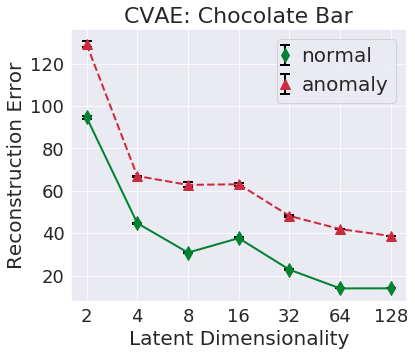

In [20]:
sns.set_style("darkgrid")
mpl.rcParams['legend.handlelength'] = 0

fig, ax = plt.subplots(figsize=(6,5))

N = (2, 4, 8, 16, 32, 64, 128)
ax.errorbar(N, rec0_means, rec0_errs, fmt="-d", linewidth=2, elinewidth=2, capsize=5, capthick=2, markersize=10, 
            color="#008230", ecolor="black", label="normal")
ax.errorbar(N, rec1_means, rec1_errs, fmt="--^", linewidth=2, elinewidth=2, capsize=5, capthick=2, markersize=10,
            color='#cd2a3d', ecolor="black", label="anomaly")

ticks = [2, 4, 8, 16, 32, 64, 128]
ax.set_xscale('log', basex=2)
ax.set_xticklabels(ticks)
plt.xticks(ticks, fontsize=18)
plt.yticks(fontsize=18)
#plt.grid(True, color='#8c8c8c', alpha=0.4, linestyle='-')
plt.title('CVAE: Chocolate Bar', fontsize=22)
ax.set_ylabel('Reconstruction Error',fontsize=20)
ax.set_xlabel('Latent Dimensionality',fontsize=20)
plt.legend(fontsize=20)

if (save_plots):
    plt.savefig(f"{FIGURES_FOLDER}/latentdimensions_vae_kitkat.png", dpi=300, bbox_inches='tight')
plt.show()

# Evaluation Metrics: Compute Mean Results and their Errors



In [21]:
pd.options.display.float_format = "{:,.3}".format

COLUMN_NAMES = ['auc_score', 'specificity', 'sensitivity', 'precision', 
                'macro_f1', 'accuracy', 'misclassification']

### Anomaly Ratio = 50%

In [22]:
anomaly_rate = 50

In [23]:
""" J=2 """
latent_dim = 2
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES
res

J2_AR50


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.64,0.623,0.6,0.614,0.612,0.612,0.388
error (+/-),0.00324,0.00541,0.00636,0.00333,0.0033,0.00328,0.00328


In [24]:
""" J=4 """
latent_dim = 4
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES
res

J4_AR50


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.799,0.683,0.855,0.73,0.767,0.769,0.231
error (+/-),0.00285,0.00615,0.00618,0.00343,0.00307,0.00305,0.00305


In [25]:
""" J=8 """
latent_dim = 8
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES
res

J8_AR50


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.928,0.853,0.932,0.864,0.892,0.893,0.107
error (+/-),0.00092,0.00208,0.00209,0.00162,0.00126,0.00126,0.00126


In [26]:
""" J=16 """
latent_dim = 16
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES
res

J16_AR50


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.914,0.832,0.942,0.849,0.887,0.887,0.113
error (+/-),0.00185,0.00256,0.00317,0.00205,0.00211,0.00211,0.00211


In [27]:
""" J=32 """
latent_dim = 32
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES
res

J32_AR50


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.966,0.931,0.96,0.933,0.946,0.946,0.0544
error (+/-),0.000746,0.00178,0.00224,0.00159,0.00119,0.00119,0.00119


In [28]:
""" J=64 """
latent_dim = 64
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES
res

J64_AR50


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.99,0.962,0.955,0.961,0.958,0.958,0.0418
error (+/-),0.000399,0.00105,0.00245,0.00103,0.00132,0.00132,0.00132


In [29]:
""" J=128 """
latent_dim = 128
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES
res

J128_AR50


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.99,0.953,0.949,0.953,0.951,0.951,0.0493
error (+/-),0.000396,0.00267,0.00305,0.00242,0.00114,0.00114,0.00114


### Anomaly Ratio = [5, 10, 30, 50, 70, 90, 95] %, $J=8$

In [30]:
latent_dim = 64

In [31]:
""" Anomaly Ratio = 5% """
anomaly_rate = 5
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# extract and save F1-scores:
F1mean_AR5 = res['macro_f1'].values[0]
F1err_AR5  = res['macro_f1'].values[1]

TNR_AR5    = res['specificity'].values[0]
TNRerr_AR5 = res['specificity'].values[1]
TPR_AR5    = res['sensitivity'].values[0]
TPRerr_AR5 = res['sensitivity'].values[1]
PPV_AR5    = res['precision'].values[0]
PPVerr_AR5 = res['precision'].values[1]

# show dataframe:
res

J64_AR5


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.99,0.968,0.977,0.645,0.876,0.969,0.0313
error (+/-),0.00185,0.00502,0.00826,0.0319,0.0134,0.00472,0.00472


In [32]:
""" Anomaly Ratio = 10% """
anomaly_rate = 10
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# extract and save F1-scores:
F1mean_AR10 = res['macro_f1'].values[0]
F1err_AR10  = res['macro_f1'].values[1]

TNR_AR10    = res['specificity'].values[0]
TNRerr_AR10 = res['specificity'].values[1]
TPR_AR10    = res['sensitivity'].values[0]
TPRerr_AR10 = res['sensitivity'].values[1]
PPV_AR10    = res['precision'].values[0]
PPVerr_AR10 = res['precision'].values[1]

# show dataframe:
res

J64_AR10


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.989,0.96,0.963,0.74,0.906,0.961,0.0393
error (+/-),0.00108,0.00494,0.00684,0.0209,0.00787,0.00415,0.00415


In [33]:
""" Anomaly Ratio = 30% """
anomaly_rate = 30
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# extract and save F1-scores:
F1mean_AR30 = res['macro_f1'].values[0]
F1err_AR30  = res['macro_f1'].values[1]

TNR_AR30    = res['specificity'].values[0]
TNRerr_AR30 = res['specificity'].values[1]
TPR_AR30    = res['sensitivity'].values[0]
TPRerr_AR30 = res['sensitivity'].values[1]
PPV_AR30    = res['precision'].values[0]
PPVerr_AR30 = res['precision'].values[1]

# show dataframe:
res

J64_AR30


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.99,0.958,0.962,0.908,0.952,0.959,0.0408
error (+/-),0.000555,0.00355,0.00323,0.00676,0.00282,0.0025,0.0025


In [34]:
""" Anomaly Ratio = 50% """
anomaly_rate = 50
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# extract and save F1-scores:
F1mean_AR50 = res['macro_f1'].values[0]
F1err_AR50  = res['macro_f1'].values[1]

TNR_AR50    = res['specificity'].values[0]
TNRerr_AR50 = res['specificity'].values[1]
TPR_AR50    = res['sensitivity'].values[0]
TPRerr_AR50 = res['sensitivity'].values[1]
PPV_AR50    = res['precision'].values[0]
PPVerr_AR50 = res['precision'].values[1]

# show dataframe:
res

J64_AR50


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.99,0.962,0.955,0.961,0.958,0.958,0.0418
error (+/-),0.000399,0.00105,0.00245,0.00103,0.00132,0.00132,0.00132


In [35]:
""" Anomaly Ratio = 70% """
anomaly_rate = 70
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# extract and save F1-scores:
F1mean_AR70 = res['macro_f1'].values[0]
F1err_AR70  = res['macro_f1'].values[1]

TNR_AR70    = res['specificity'].values[0]
TNRerr_AR70 = res['specificity'].values[1]
TPR_AR70    = res['sensitivity'].values[0]
TPRerr_AR70 = res['sensitivity'].values[1]
PPV_AR70    = res['precision'].values[0]
PPVerr_AR70 = res['precision'].values[1]

# show dataframe:
res

J64_AR70


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.991,0.967,0.951,0.985,0.949,0.956,0.0442
error (+/-),0.000506,0.00168,0.00115,0.000729,0.000872,0.000768,0.000768


In [36]:
""" Anomaly Ratio = 90% """
anomaly_rate = 90
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# extract and save F1-scores:
F1mean_AR90 = res['macro_f1'].values[0]
F1err_AR90  = res['macro_f1'].values[1]

TNR_AR90    = res['specificity'].values[0]
TNRerr_AR90 = res['specificity'].values[1]
TPR_AR90    = res['sensitivity'].values[0]
TPRerr_AR90 = res['sensitivity'].values[1]
PPV_AR90    = res['precision'].values[0]
PPVerr_AR90 = res['precision'].values[1]

# show dataframe:
res

J64_AR90


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.991,0.967,0.961,0.996,0.908,0.962,0.0384
error (+/-),0.00114,0.00557,0.00422,0.000621,0.00711,0.00348,0.00348


In [37]:
""" Anomaly Ratio = 95% """
anomaly_rate = 95
filename = f'J{latent_dim}_AR{anomaly_rate}'
print (filename)

df = pd.read_csv(f"{PATH}/{filename}.csv", 
                 usecols = [f'{COLUMN_NAMES[0]}', f'{COLUMN_NAMES[1]}', f'{COLUMN_NAMES[2]}',
                            f'{COLUMN_NAMES[3]}', f'{COLUMN_NAMES[4]}', f'{COLUMN_NAMES[5]}', f'{COLUMN_NAMES[6]}']) 
#df

""" compute mean of means and its error for each evaluation metroc and save as new dataframe """
means, errs = [], []
for column_name in df:
    means.append(mean_of_mean(df[column_name].values)[0])
    errs.append(mean_of_mean(df[column_name].values)[1])

# combine results into same list:
L = [means, errs]

# contruct the dataframe:
res = pd.DataFrame(L, index=['mean of mean', 'error (+/-)'])
res.columns = COLUMN_NAMES

# extract and save F1-scores:
F1mean_AR95 = res['macro_f1'].values[0]
F1err_AR95  = res['macro_f1'].values[1]

TNR_AR95    = res['specificity'].values[0]
TNRerr_AR95 = res['specificity'].values[1]
TPR_AR95    = res['sensitivity'].values[0]
TPRerr_AR95 = res['sensitivity'].values[1]
PPV_AR95    = res['precision'].values[0]
PPVerr_AR95 = res['precision'].values[1]

# show dataframe:
res

J64_AR95


,auc_score,specificity,sensitivity,precision,macro_f1,accuracy,misclassification
mean of mean,0.99,0.971,0.962,0.998,0.86,0.962,0.0376
error (+/-),0.00226,0.00887,0.00585,0.000492,0.0157,0.00548,0.00548


### Plot macro-average $F_1$-scores

In [38]:
save_measurements = False

In [46]:
# stack scores:
F1_mean = np.array([F1mean_AR5, F1mean_AR10, F1mean_AR30, F1mean_AR50, F1mean_AR70, F1mean_AR90, F1mean_AR95])
F1_err  = np.array([F1err_AR5, F1err_AR10, F1err_AR30, F1err_AR50, F1err_AR70, F1err_AR90, F1err_AR95])

TNR_mean = np.array([TNR_AR5, TNR_AR10, TNR_AR30, TNR_AR50, TNR_AR70, TNR_AR90, TNR_AR95])
TNR_err  = np.array([TNRerr_AR5, TNRerr_AR10, TNRerr_AR30, TNRerr_AR50, TNRerr_AR70, TNRerr_AR90, TNRerr_AR95])

TPR_mean = np.array([TPR_AR5, TPR_AR10, TPR_AR30, TPR_AR50, TPR_AR70, TPR_AR90, TPR_AR95])
TPR_err  = np.array([TPRerr_AR5, TPRerr_AR10, TPRerr_AR30, TPRerr_AR50, TPRerr_AR70, TPRerr_AR90, TPRerr_AR95])

PPV_mean = np.array([PPV_AR5, PPV_AR10, PPV_AR30, PPV_AR50, PPV_AR70, PPV_AR90, PPV_AR95])
PPV_err  = np.array([PPVerr_AR5, PPVerr_AR10, PPVerr_AR30, PPVerr_AR50, PPVerr_AR70, PPVerr_AR90, PPVerr_AR95])

# save scores as `.npy` files:
if save_measurements == True:
    np.save(f'{MEASUREMENTS_FOLDER}/F1_mean.npy', F1_mean)
    np.save(f'{MEASUREMENTS_FOLDER}/F1_err.npy', F1_err)
    np.save(f'{MEASUREMENTS_FOLDER}/TNR_mean.npy', TNR_mean)
    np.save(f'{MEASUREMENTS_FOLDER}/TNR_err.npy', TNR_err)
    np.save(f'{MEASUREMENTS_FOLDER}/TPR_mean.npy', TPR_mean)
    np.save(f'{MEASUREMENTS_FOLDER}/TPR_err.npy', TPR_err)
    np.save(f'{MEASUREMENTS_FOLDER}/PPV_mean.npy', PPV_mean)
    np.save(f'{MEASUREMENTS_FOLDER}/PPV_err.npy', PPV_err)

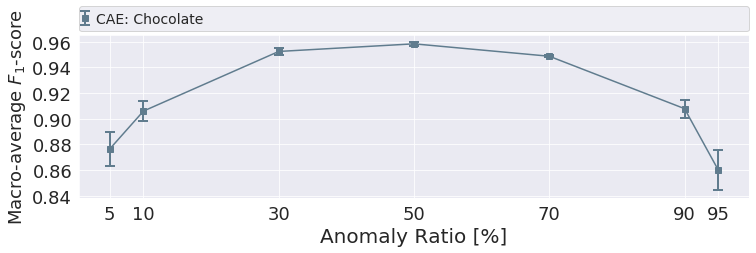

In [40]:
sns.set_style("darkgrid")
mpl.rcParams['legend.handlelength'] = 0

#fig, ax = plt.subplots(figsize=(6,5))
fig, ax = plt.subplots(figsize=(12,3))

N = (5, 10, 30, 50, 70, 90, 95)
ax.errorbar(N, AR_mean, AR_err, fmt="-s", linewidth=1.5, elinewidth=2, capsize=5, capthick=2, markersize=6, 
             color='#607c8e', ecolor='#607c8e', label="CAE: Chocolate")

ticks = [5, 10, 30, 50, 70, 90, 95]
#ax.set_xscale('log', basex=20)
plt.xticks(ticks, fontsize=18)
plt.yticks(fontsize=18)

#plt.grid(True, color='#8c8c8c', alpha=0.4, linestyle='-')
#plt.title('Anomaly Ratios', fontsize=22, pad=40)
ax.set_ylabel(r'Macro-average $F_1$-score',fontsize=18)
ax.set_xlabel('Anomaly Ratio [%]',fontsize=20)

ax.legend(bbox_to_anchor=(0, 1.02, 1, 0.2), loc='lower left', mode='expand', borderaxespad=0, ncol=1,
               numpoints=1, fontsize=14) 

plt.show()

## Stat. on ROC Curve

https://www.google.com/search?q=roc+curve+standard+deviation&rlz=1C1AWFC_enDK895DK895&sxsrf=ALeKk02BsAMnzMNI1I07F0ZdR9B6kxIhjg:1611911859612&tbm=isch&source=iu&ictx=1&fir=CVec08MUMFVnxM%252C2YX5vQqFOQgStM%252C_&vet=1&usg=AI4_-kQaE1aBILRfc-B8tT2Z5B_6jVxouw&sa=X&ved=2ahUKEwjklbTO58DuAhVnhosKHdLPA5wQ9QF6BAgJEAE&cshid=1611911895627715#imgrc=CVec08MUMFVnxM

https://hal.inria.fr/hal-02396279/document


https://github.com/arviz-devs/arviz/issues/2

In [41]:
import re

def make_dataframe(df, column_name=column_name):
    
    def convert_str_to_float(df, column_name=column_name, row_number=0):
        def urlify(s):
            """
            Source: https://stackoverflow.com/questions/1007481/how-do-i-replace-whitespaces-with-underscore
            """
            # Remove all non-word characters (everything except numbers and letters)
            #s = re.sub(r"[^\w\s]", '', s)

            # Replace all runs of whitespace with a single dash
            s = re.sub(r"\s+", ',', s)
            return s
        
        """ convert to numpy arrays """
        # remove white space from string type:
        column = df[f'{column_name}'][row_number]
        string = urlify(column)

        # convert from string to list:
        listRes = string.strip('][').split(',')
        listRes = listRes[:-1]                        # delete last white element space 

        # convert from list to (float) numpy array
        array = np.array(listRes, dtype=np.float64)
        return array
    
    """ contruct new dataframe """
    # construct column names:
    N = len(df[f'{column_name}'])
    set_column_names = []
    for i in range(N):
        set_column_names.append(f'n={i}')
    
    # make new dataframe:
    df_new = pd.DataFrame(columns=set_column_names)
    for row_number in range(len(df[f'{column_name}'])):
        array = convert_str_to_float(df, column_name=column_name, row_number=row_number)

        for j in range(len(array)):
            df_new.loc[j, f'{set_column_names[row_number]}'] = array[j]
    return df_new    

In [42]:
COLUMN_NAMES = ['fpr', 'tpr']
latent_dim = 64

### Get Data

In [43]:
""" Anomaly Ratio = 50% """
anomaly_rate = 50

""" J=64 """
filename = f'J{latent_dim}_AR{anomaly_rate}'
COLUMN_NAME = 'fpr'

df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

df_fpr = make_dataframe(df, column_name=COLUMN_NAME)
#df_fpr

# compute and add quantiles to dataframe:
df_fpr['Q1'] = df_fpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q2'] = df_fpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr['Q3'] = df_fpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_fpr

J64_AR50 fpr


,n=0,n=1,n=2,n=3,n=4,n=5,n=6,n=7,n=8,n=9,n=10,n=11,n=12,n=13,n=14,Q1,Q2,Q3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,0.988,0.988,0.988,0.988,0.988,0.988,0.988,0.988,0.988,0.988,0.988,0.988,0.988,0.988,0.988,0.988,0.988,0.988
677,0.991,0.991,0.991,0.991,0.991,0.991,0.991,0.991,0.991,0.991,0.991,0.991,0.991,0.991,0.991,0.991,0.991,0.991
678,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994,0.994
679,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997,0.997


In [44]:
""" J=64 """
filename = f'J{latent_dim}_AR{anomaly_rate}'

COLUMN_NAME = 'tpr'
df = pd.read_csv(f"{PATH}/{filename}.csv",
                usecols = [f'{COLUMN_NAME}']
                ) 
print (filename, COLUMN_NAME)

# convert to dataframe:
df_tpr = make_dataframe(df, column_name=COLUMN_NAME)

# compute and add quantiles to dataframe:
df_tpr['Q1'] = df_tpr.astype(float).quantile(q=0.25, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q2'] = df_tpr.astype(float).quantile(q=0.50, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr['Q3'] = df_tpr.astype(float).quantile(q=0.75, axis=1, numeric_only=True, interpolation='linear').reset_index(drop=True)
df_tpr

J64_AR50 tpr


,n=0,n=1,n=2,n=3,n=4,n=5,n=6,n=7,n=8,n=9,n=10,n=11,n=12,n=13,n=14,Q1,Q2,Q3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00294,0.00294,0.00294,0.00294,0.00294,0.00294,0.00294,0.00294,0.00294,0.00294,0.00294,0.00294,0.00294,0.00294,0.00294,0.00294,0.00294,0.00294
2,0.00588,0.00588,0.00588,0.00588,0.00588,0.00588,0.00588,0.00588,0.00588,0.00588,0.00588,0.00588,0.00588,0.00588,0.00588,0.00588,0.00588,0.00588
3,0.00882,0.00882,0.00882,0.00882,0.00882,0.00882,0.00882,0.00882,0.00882,0.00882,0.00882,0.00882,0.00882,0.00882,0.00882,0.00882,0.00882,0.00882
4,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118,0.0118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
677,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
678,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
679,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### Plot

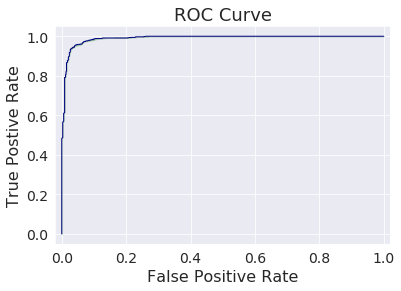

In [45]:
fig, ax = plt.subplots(1, 1, figsize = (6, 4))


line_color='navy'
ax.plot(df_fpr['Q2'].to_numpy(), df_tpr['Q2'].to_numpy(), 
         '-', color=line_color, lw=1) # label = 'CVAE (AUC=%2.3f)' % auc_score

alpha = 0.2
color = 'g'

ax.fill_between(df_fpr['Q2'].to_numpy(), df_tpr['Q1'].to_numpy(), df_tpr['Q3'].to_numpy(), 
                alpha=0.2, edgecolor=None, color=color)
        
#ax.fill_between(df_fpr['Q2'].to_numpy(), df_tpr['Q1'].to_numpy(), df_tpr['Q3'].to_numpy(), 
#                alpha=0.2, edgecolor='#1B2ACC', facecolor='#089FFF', linewidth=1, 
#                antialiased=True, label='bablald')

plt.xlabel('False Positive Rate', fontsize=16)   #FPR ($1$ - TNR)
plt.ylabel('True Postive Rate', fontsize=16)               # TPR
plt.xlim([-0.02, 1.02])
plt.ylim([-0.05, 1.05]) #plt.ylim([-0.02, 1.03])
plt.title("ROC Curve", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=14)
#plt.legend(loc="lower right", fontsize=14)

plt.gca()
#if (save_plots):
#    plt.savefig(f"{FIGURES_FOLDER}/ROC_quantiles.png", dpi=300, bbox_inches='tight')
plt.show()